#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


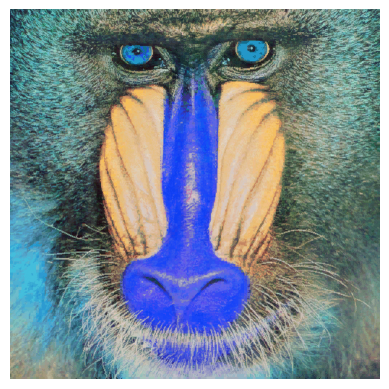

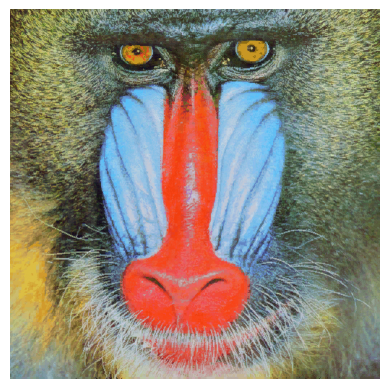

In [2]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Mostramos la imagen original con matplotlib
    plt.figure()
    #Eliminamos etiquetas de los ejes
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

Convierte a grises para procesamiento posterior

(512, 512)


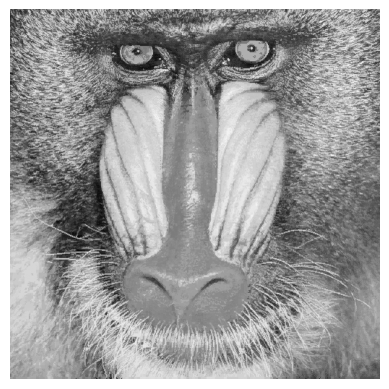

In [3]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de contornos multietapa. Tratado en las sesiones de teoría (tema 4)

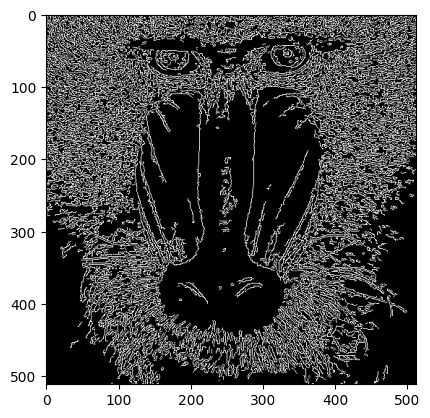

In [4]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Contar el número de píxeles no nulos por columna y visualizar

(0.0, 512.0)

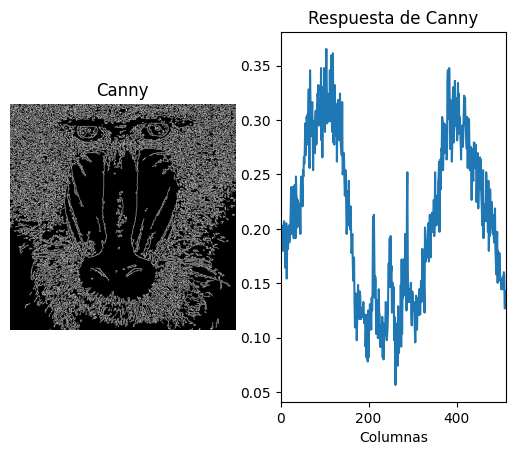

In [5]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

El valor máximo de píxeles blancos por fila es: 56100
La fila número 12 es igual o mayor que 0.95*max, con un valor de [56100]
La fila número 100 es igual o mayor que 0.95*max, con un valor de [54060]


(0.0, 512.0)

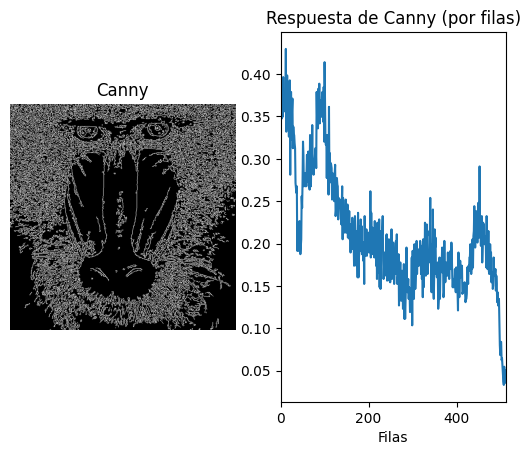

In [6]:
#Suma los valores de los pixeles por filas
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[1])

max_white_pixels = np.max(row_counts)
print(f"El valor máximo de píxeles blancos por fila es: {max_white_pixels}")
for indice,row in enumerate(row_counts):
    if(row > 0.95*max_white_pixels):
        print(f"La fila número {indice} es igual o mayor que 0.95*max, con un valor de {row}")


plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny (por filas)")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, canny.shape[0]])  # Ahora se usa el número de filas


Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio
El operador de Sobel aproxima el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1].

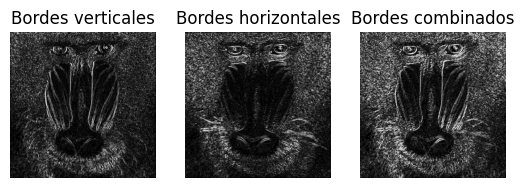

In [7]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

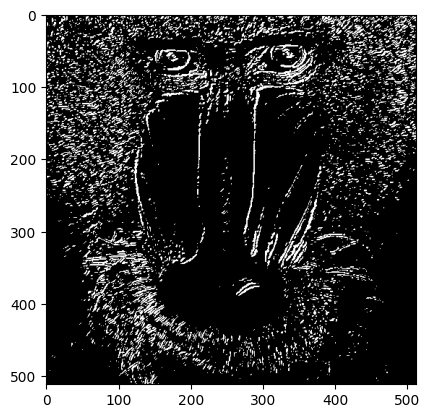

In [8]:
#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
# Convertir Sobel a 8 bits
sobel_8bit = cv2.convertScaleAbs(sobel)  
#Define valor umbral
valorUmbral = 130 
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel_8bit, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()


El valor máximo de píxeles blancos por columna es: 45645
La columna número 288 es igual o mayor que 0.95*max, con un valor de 45645


(0.0, 512.0)

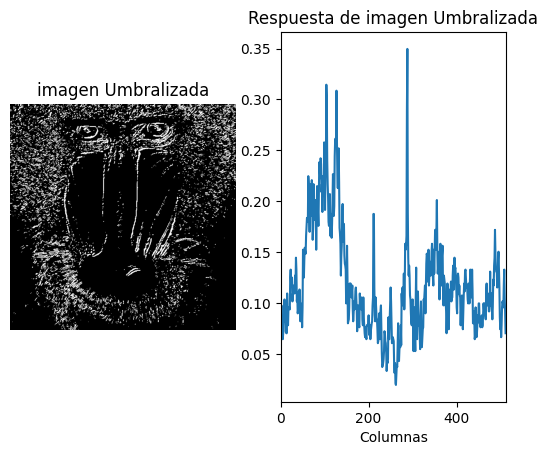

In [9]:

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[0])

max_white_pixels_col = np.max(col_counts)
print(f"El valor máximo de píxeles blancos por columna es: {max_white_pixels_col}")

for indice,col in enumerate(col_counts[0]):
    if(col > 0.95*max_white_pixels_col):
        print(f"La columna número {indice} es igual o mayor que 0.95*max, con un valor de {col}")

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de imagen Umbralizada")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[1]])

El valor máximo de píxeles blancos por fila es: 41055
La fila número 3 es igual o mayor que 0.95*max, con un valor de [39525]
La fila número 82 es igual o mayor que 0.95*max, con un valor de [41055]
La fila número 83 es igual o mayor que 0.95*max, con un valor de [39270]


(0.0, 512.0)

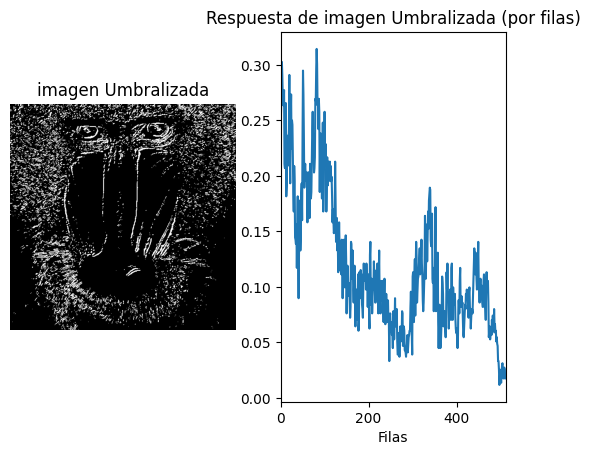

In [10]:
#Suma los valores de los pixeles por filas
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[1])

max_white_pixels = np.max(row_counts)
print(f"El valor máximo de píxeles blancos por fila es: {max_white_pixels}")
for indice,row in enumerate(row_counts):
    if(row > 0.95*max_white_pixels):
        print(f"La fila número {indice} es igual o mayor que 0.95*max, con un valor de {row}")


plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("imagen Umbralizada")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de imagen Umbralizada (por filas)")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, imagenUmbralizada.shape[0]])  # Ahora se usa el número de filas



TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [14]:


#Reinterpretacion "My little piece of privacy"


def encontrar_brillante(imagen, width_bloque=8):
    # Convertimos la imagen a escala de grises
    
    h, w = imagen.shape
    
    # Inicializamos el valor máximo de brillo y la posición
    max_brilho = -1
    max_pos = 0  # Solo necesitamos la posición X, porque el bloque cubre todo el alto

    # Recorremos la imagen en columnas de 8 píxeles de ancho
    for x in range(0, w, width_bloque):
        # Definir la región de 8 píxeles de ancho que cubre todo el alto
        bloque = imagen[:, x:x+width_bloque]
        brillo_bloque = np.mean(bloque)  # Calcular el brillo promedio del bloque vertical

        # Comparamos el brillo promedio de este bloque con el valor máximo encontrado
        if brillo_bloque > max_brilho:
            max_brilho = brillo_bloque
            max_pos = x  # Guardamos la posición X del bloque con mayor brillo
    
    # Devolvemos solo la posición X del bloque con mayor brillo
    return max_pos

# Captura de video desde la cámara
vid = cv2.VideoCapture(0)

# Definir la posición inicial de la barra en el centro de la imagen
pos_x_actual = 0

# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

while True:      
    # Leer fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Objeto en movimiento
        objetos = eliminadorFondo.apply(frame)
        
        # Determinar la posición x del objeto en movimiento
        pos_x_objetivo = encontrar_brillante(objetos)

        # Mover la posición actual poco a poco hacia la posición objetivo
        pos_x_actual = int(pos_x_actual * (1 - 0.2) + pos_x_objetivo * 0.2)

        # Definir las esquinas del rectángulo 
        top_left_x = max(0, pos_x_actual - 80) 
        bottom_right_x = min(frame.shape[1], pos_x_actual + 80)
        top_left_y = 0 
        bottom_right_y = frame.shape[0]  
            
        # Crear una capa superpuesta (una copia de la imagen original)
        overlay = frame.copy()

        # Dibujar el rectángulo en la capa con un color sólido
        cv2.rectangle(overlay, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (255, 255, 255), -1)

        # Aplicar el efecto de transparencia utilizando el mezclado alfa (alpha blending)
        frame = cv2.addWeighted(overlay, 0.5, frame, 0.5, 0)


        # Mostrar los objetos en movimiento
        cv2.imshow('Fotograma', objetos)

        # Mostrar el fotograma con la barra que se mueve suavemente hacia el movimiento
        cv2.imshow('Cortina', frame)
    # Detener cuando se presiona ESC
    if cv2.waitKey(20) == 27:
        break
  
# Liberar el objeto de captura
vid.release()
# Destruir todas las ventanas
cv2.destroyAllWindows()


In [13]:
# Party Time
vid = cv2.VideoCapture(0)

mapas_colores = [cv2.COLORMAP_JET, cv2.COLORMAP_HOT, cv2.COLORMAP_RAINBOW, cv2.COLORMAP_OCEAN, cv2.COLORMAP_COOL]
map = 0
count = 0

# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

while(True):      
  # fotograma a fotograma
  ret, frame = vid.read()

  if ret:
      # Aplica efecto espejo sobre la entrada
      framem=cv2.flip(frame, 1)
      #Con un segundo parámerto se puede definir máscara con zonas a actualizar
      objetos = eliminadorFondo.apply(framem)
      
      # Contamos el número de pixeles activos y los mostramos
      pixeles_activos = cv2.countNonZero(objetos)
      cv2.putText(objetos, str(pixeles_activos), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

      if (pixeles_activos >= 5000):
        frame = cv2.applyColorMap(frame, mapas_colores[map])
        count +=1

        if (count == 10):
           count = 0
           
           map += 1

        if (map == 4) : map = 0

      # Muestra resultado
      cv2.imshow('En movimiento', objetos)
      # Muestra el video
      cv2.imshow('Fotograma', frame)
  
  # Detenemos pulsado ESC
  if cv2.waitKey(20) == 27:
      break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
